In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy.stats

In [17]:
project_dir = '/s/project/mll/sergey/pausing/'

In [88]:
data = {}

for model in ('linear_regression', 'random_forest','gbm'):
    with open(project_dir + f'/K562_50_50_preds/{model}.pickle', 'rb') as f:
        data[model] = pickle.load(f)

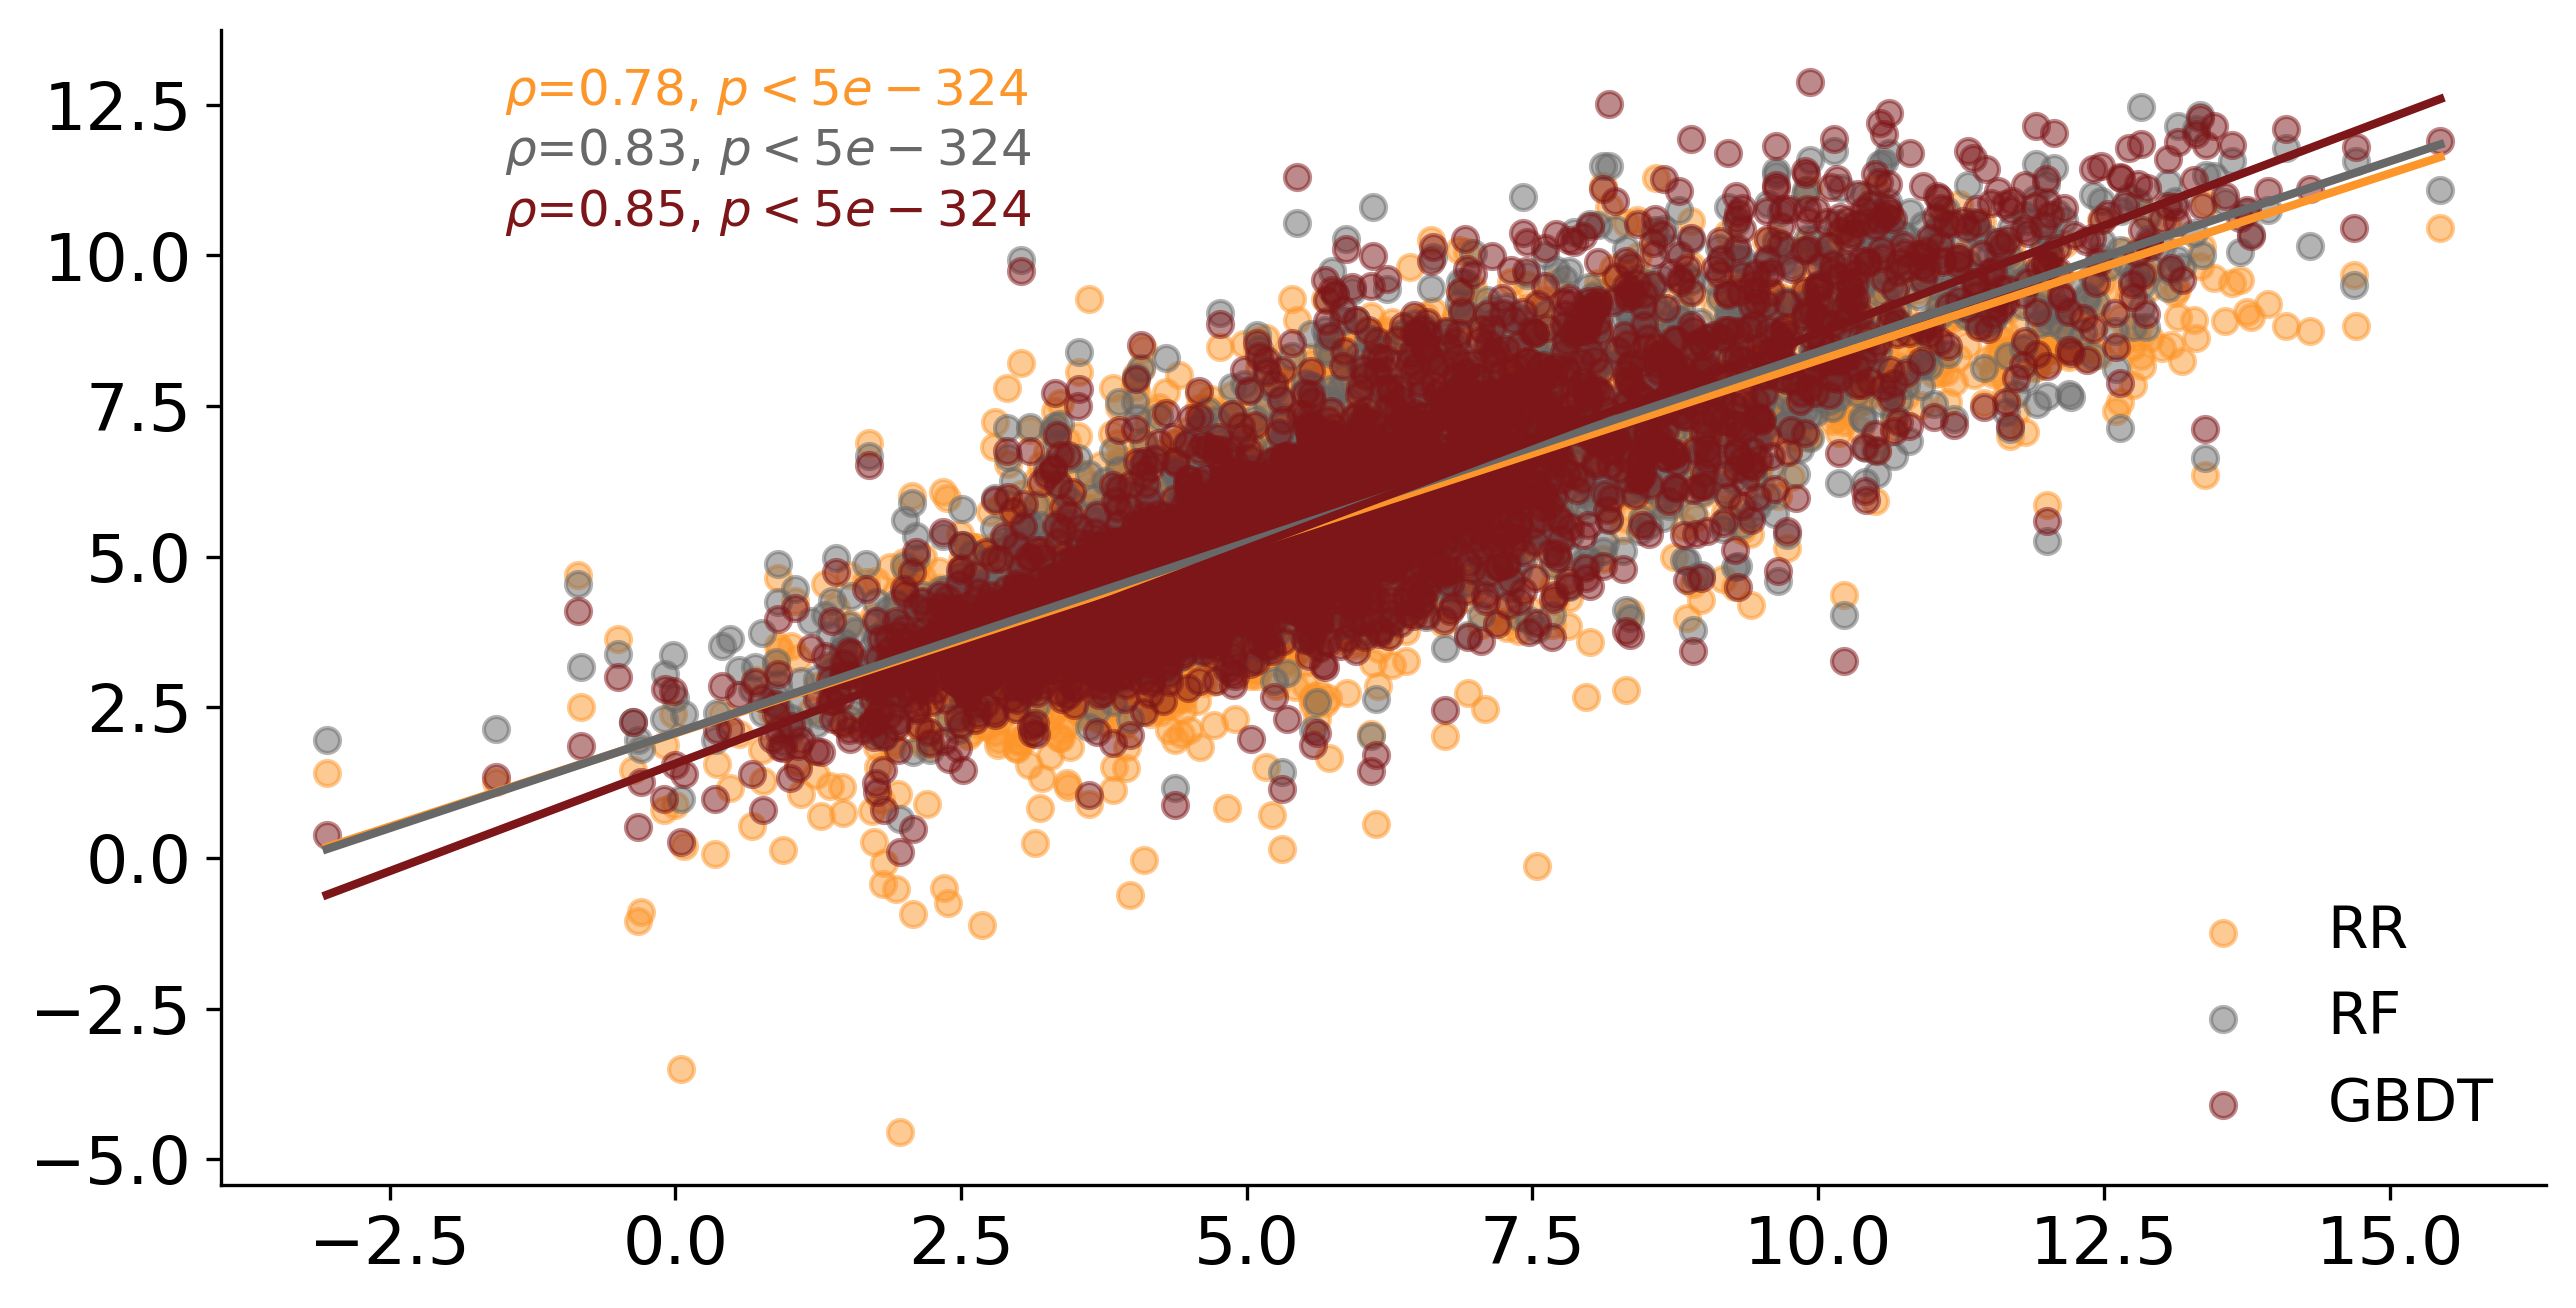

In [114]:
colors = {'linear_regression':'#FD962A', 'gbm':'#7D1618','random_forest':'#686868'}

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

plot_idx=0

for model in ('linear_regression', 'random_forest','gbm'):
    y_true = data[model]['y_true'].values
    y_pred = data[model]['y_pred']
    
    ax.scatter(x=y_true,y=y_pred, label=model,c=colors[model],alpha=0.5)
    
    pearson_r, p_value = scipy.stats.pearsonr(y_true,y_pred)
    
    k, b = np.polyfit(y_true,y_pred,deg=1)
    
    ax.plot(np.sort(y_true), k*np.sort(y_true)+b,c=colors[model],linewidth=2,label='_nolegend_')
    
    ax.text(x=-1.5, y=12.5-plot_idx*1, s=r"$\rho$"+f'={pearson_r:.2f}, '+r"$p<5e-324$",c=colors[model], fontsize=12)
    
    plot_idx += 1
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(fontsize=14,loc='lower right',labels=('RR','RF','GBDT'),frameon=False)

plt.savefig(project_dir + f'/K562_50_50_preds/res.png')

In [115]:
project_dir + f'/K562_50_50_preds/res.png'

'/s/project/mll/sergey/pausing//K562_50_50_preds/res.png'

In [110]:
import math

math.nextafter(0, 1)

5e-324

In [111]:
type(pearson_r)

numpy.float64

In [112]:
np.nextafter(0,1)

5e-324